# 工作周报
_2023年10月22日_

以下是本周的工作内容：

1. 跑通前人代码，修改图片输入的24位处理，以及合成大图的重叠框
2. 根据上述代码输出结果，制作新数据集



1. 代码输出结果图

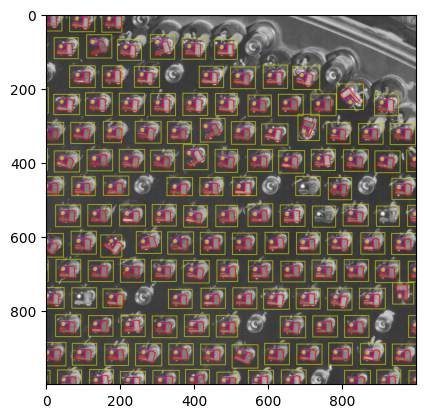

In [5]:
from matplotlib import pyplot as plt
import matplotlib.image as mpimg

# 读取图像
img = mpimg.imread('/home/lele/Work/zzchen/data/out_png/230918_115413_00_000_00_A.raw.output.png')
img_cropped = img[1000:2000, 1000:2000]

# 展示图像
plt.imshow(img_cropped)
plt.show()


2. 数据集对展示

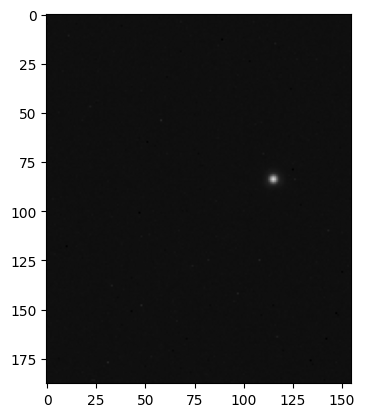

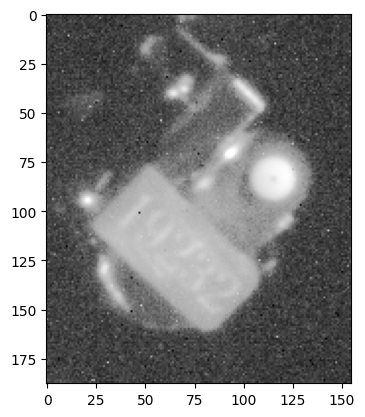

In [8]:
import numpy as np
import cv2

# display front and back pic
def display_image_24to16(img):
    coeffi = 1 / (np.max(img)*1.2) * (2**16-1)
    img_16bit = img * coeffi
    # print(img_16bit)
    img_16bit = img_16bit.astype(np.uint16)
    plt.imshow(img_16bit, cmap='gray', vmin=0, vmax=(2**16-1))
    plt.show()
    
    return img_16bit

def display_image(path):
    img = cv2.imread(path)
    plt.imshow(img, cmap='gray', vmin=0, vmax=(2**8-1))
    plt.show()

folder = 'B_230918_115413/'
file_num = '37_7697_3707'
path1_back = '/home/lele/Work/zzchen/data/dataset/back_crop_np/' + folder + file_num + '.npy'
path1_front = '/home/lele/Work/zzchen/data/dataset/front_crop_pic/' + folder + file_num + '.png'
label_np = np.load(path1_back)
display_image_24to16(label_np)
display_image(path1_front)